In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
font = {'weight' : 'medium',
       'size'   : 13}
matplotlib.rc('font', **font)

from mpl_toolkits import mplot3d


from csr2d.wake import green_mesh
from csr2d.convolution import fftconvolve2

import time

import concurrent.futures as cf


import scipy.constants
mec2 = scipy.constants.value('electron mass energy equivalent in MeV')*1e6
c_light = scipy.constants.c
e_charge = scipy.constants.e
r_e = scipy.constants.value('classical electron radius')

In [2]:
gamma = 500
rho = 1.0 # Bend radius in m

# Total charge
Nb = 6.25e9
Q = e_charge * Nb

## Additional parameters
beta = (1-1/gamma**2)**(1/2)
mc2 = 510998.950
p0c = gamma * beta * mc2  # in eV

sigma_x  = 10e-6
sigma_z  = 10e-6

In [3]:
# Bypassing the beam, use smooth Gaussian distribution

def lamb_2d(z,x):
    return 1/(2*np.pi*sigma_x*sigma_z)* np.exp(-z**2 / 2 / sigma_z**2 - x**2 / 2 / sigma_x**2)
def lamb_2d_prime(z,x):
    return 1/(2*np.pi*sigma_x*sigma_z)* np.exp(-z**2 / 2 / sigma_z**2 - x**2 / 2 / sigma_x**2) * (-z / sigma_z**2)

In [12]:
nz = 2048
nx = 2048

zvec = np.linspace(-5*sigma_z, 5*sigma_z, nz)
xvec = np.linspace(-5*sigma_x, 5*sigma_x, nx)
Z, X = np.meshgrid(zvec, xvec, indexing='ij')

lambda_grid_filtered = lamb_2d(Z,X)
lambda_grid_filtered_prime = lamb_2d_prime(Z,X)

dz = (10*sigma_z) / (nz - 1)
dx = (10*sigma_x) / (nx - 1)

In [13]:
t1 = time.time()
Fx_case_B_grid_IGF = green_mesh((nz, nx), (dz, dx), rho=rho, gamma=gamma, component= 'Fx_IGF')

t2 = time.time()
print('IGF for Fx takes:', t2-t1, 'sec')

IGF for 12288 points...


/global/homes/w/wlou1991/cfs/CSR2D/csr2d/wake.py:127: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return integrate.quad(func_z, z-dz/2, z+dz/2,
/global/homes/w/wlou1991/cfs/CSR2D/csr2d/wake.py:127: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(func_z, z-dz/2, z+dz/2,
/global/homes/w/wlou1991/cfs/CSR2D/csr2d/wake.py:127: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is a

Done. Starting midpoint method...
IGF for Fx takes: 6.4611451625823975 sec


In [14]:
conv_x = fftconvolve2(lambda_grid_filtered, Fx_case_B_grid_IGF)[0]
Wx = (beta**2 / abs(rho)) * conv_x *(dx*dz)

In [15]:
Z0 = np.array([-5.00000000e-05, -4.92187500e-05, -4.84375000e-05, -4.76562500e-05,
       -4.68750000e-05, -4.60937500e-05, -4.53125000e-05, -4.45312500e-05,
       -4.37500000e-05, -4.29687500e-05, -4.21875000e-05, -4.14062500e-05,
       -4.06250000e-05, -3.98437500e-05, -3.90625000e-05, -3.82812500e-05,
       -3.75000000e-05, -3.67187500e-05, -3.59375000e-05, -3.51562500e-05,
       -3.43750000e-05, -3.35937500e-05, -3.28125000e-05, -3.20312500e-05,
       -3.12500000e-05, -3.04687500e-05, -2.96875000e-05, -2.89062500e-05,
       -2.81250000e-05, -2.73437500e-05, -2.65625000e-05, -2.57812500e-05,
       -2.50000000e-05, -2.42187500e-05, -2.34375000e-05, -2.26562500e-05,
       -2.18750000e-05, -2.10937500e-05, -2.03125000e-05, -1.95312500e-05,
       -1.87500000e-05, -1.79687500e-05, -1.71875000e-05, -1.64062500e-05,
       -1.56250000e-05, -1.48437500e-05, -1.40625000e-05, -1.32812500e-05,
       -1.25000000e-05, -1.17187500e-05, -1.09375000e-05, -1.01562500e-05,
       -9.37500000e-06, -8.59375000e-06, -7.81250000e-06, -7.03125000e-06,
       -6.25000000e-06, -5.46875000e-06, -4.68750000e-06, -3.90625000e-06,
       -3.12500000e-06, -2.34375000e-06, -1.56250000e-06, -7.81250000e-07,
        2.92755762e-20,  7.81250000e-07,  1.56250000e-06,  2.34375000e-06,
        3.12500000e-06,  3.90625000e-06,  4.68750000e-06,  5.46875000e-06,
        6.25000000e-06,  7.03125000e-06,  7.81250000e-06,  8.59375000e-06,
        9.37500000e-06,  1.01562500e-05,  1.09375000e-05,  1.17187500e-05,
        1.25000000e-05,  1.32812500e-05,  1.40625000e-05,  1.48437500e-05,
        1.56250000e-05,  1.64062500e-05,  1.71875000e-05,  1.79687500e-05,
        1.87500000e-05,  1.95312500e-05,  2.03125000e-05,  2.10937500e-05,
        2.18750000e-05,  2.26562500e-05,  2.34375000e-05,  2.42187500e-05,
        2.50000000e-05,  2.57812500e-05,  2.65625000e-05,  2.73437500e-05,
        2.81250000e-05,  2.89062500e-05,  2.96875000e-05,  3.04687500e-05,
        3.12500000e-05,  3.20312500e-05,  3.28125000e-05,  3.35937500e-05,
        3.43750000e-05,  3.51562500e-05,  3.59375000e-05,  3.67187500e-05,
        3.75000000e-05,  3.82812500e-05,  3.90625000e-05,  3.98437500e-05,
        4.06250000e-05,  4.14062500e-05,  4.21875000e-05,  4.29687500e-05,
        4.37500000e-05,  4.45312500e-05,  4.53125000e-05,  4.60937500e-05,
        4.68750000e-05,  4.76562500e-05,  4.84375000e-05,  4.92187500e-05,
        5.00000000e-05])

Wx0 = np.array([ 20924.1025531 ,  21292.69283807,  21675.07566734,  22072.64554097,
        22487.21221166,  22919.01062748,  23371.06883308,  23843.81093142,
        24338.99268096,  24856.05697075,  25404.77159184,  25976.98376743,
        26584.9350702 ,  27242.68762092,  27917.95683103,  28651.19870504,
        29446.0837835 ,  30258.85625712,  31175.32941465,  32167.02053868,
        33244.64913318,  34409.76693433,  35712.81653206,  37153.9554634 ,
        38708.38439955,  40443.1536767 ,  42336.32048817,  44500.61953054,
        46799.5942963 ,  49499.64654115,  52458.01837621,  55983.12795791,
        59310.7858697 ,  63329.82412636,  67871.78231555,  72914.4241459 ,
        78393.43259127,  84407.93747769,  90657.34087464,  97940.4537008 ,
       106517.9413773 , 113823.69399398, 122874.33235029, 131884.92786995,
       141707.7877252 , 151930.88900143, 163219.02483719, 174193.16405926,
       185572.50046693, 196721.05530785, 208640.23881089, 220144.12600383,
       230951.66772263, 242050.48447076, 252355.50489707, 261128.4628703 ,
       269568.94749835, 277846.65706682, 284353.18921842, 289432.2936765 ,
       292395.72803898, 295449.13714478, 296553.74854004, 297310.70138594,
       295349.77985956, 291846.39260125, 286245.8054862 , 281330.25150242,
       273053.28627802, 264380.67016792, 255103.49640236, 244189.91701775,
       232821.27413835, 220281.42887161, 209356.67454658, 195841.30088595,
       184065.02847913, 171084.14752474, 158796.53215527, 146517.29662253,
       135011.14604831, 123138.59119762, 112324.58210574, 102398.36169647,
        92381.5679822 ,  83703.27470694,  75263.16397172,  67359.02086651,
        60514.57860239,  54339.69685499,  48884.84235149,  43806.25303235,
        39281.74796551,  34911.29235508,  31676.93370473,  28604.21140844,
        25851.65485099,  23538.82074127,  21693.65748305,  19653.11134228,
        18204.20423414,  16882.84141304,  15791.63462842,  14725.51409413,
        13945.54481385,  13160.16335164,  12512.77875792,  11899.33412465,
        11414.5239908 ,  10978.22703782,  10572.66063214,  10241.66658078,
         9923.31131116,   9628.56745008,   9369.73696388,   9117.96295579,
         8892.40247908,   8687.17468172,   8485.36276988,   8302.15002451,
         8127.41943805,   7957.17286717,   7793.65613881,   7646.54110121,
         7501.06438303,   7362.87432124,   7229.12819513,   7101.32309252,
         6978.40537546])

x_observe_index : 1023


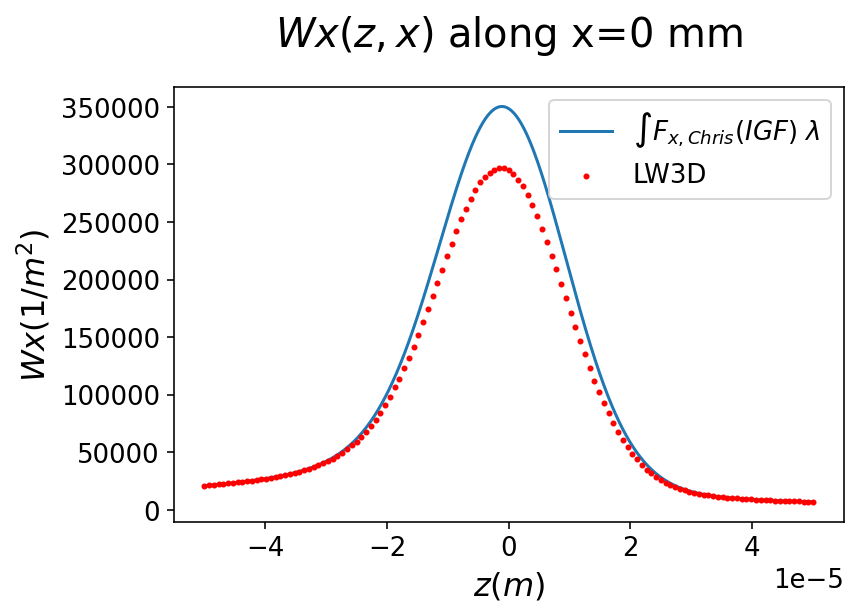

In [16]:
x_observe = 0
x_observe_index = np.argmin(np.abs(xvec - x_observe))
print('x_observe_index :', x_observe_index )

plt.plot(zvec, conv_x[:,x_observe_index]* (dz * dx), label=r'$\int F_{x, Chris} (IGF) ~ \lambda}$')
#plt.plot(zvec, conv_x6[:,x_observe_index]* (dz * dx), label=r'$\int F_{x, Chris, no SC} (IGF) ~ \lambda}$')

plt.scatter(Z0,Wx0,c='red', zorder = 3, s=4, label='LW3D')

plt.xlabel(r'$z(m)$', fontsize=16)
plt.ylabel(r'$Wx (1/m^2)$', fontsize=16)
plt.title(fr'$Wx(z,x)$ along x={x_observe} mm',  fontsize=20, pad=20)
plt.legend()

# Psi_s

In [17]:
t1 = time.time()
psi_s_grid = green_mesh((nz, nx), (dz, dx), rho=rho, gamma=gamma, component= 'psi_s')

t2 = time.time()
print('IGF for psi_s takes:', t2-t1, 'sec')

IGF for psi_s takes: 0.46759796142578125 sec


In [18]:
conv_s = fftconvolve2(lambda_grid_filtered_prime, psi_s_grid)[0]
Ws_grid = (beta**2 / abs(rho)) * conv_s *(dx*dz)

Text(0.5, 0.92, '$W_s$ benchmarking')

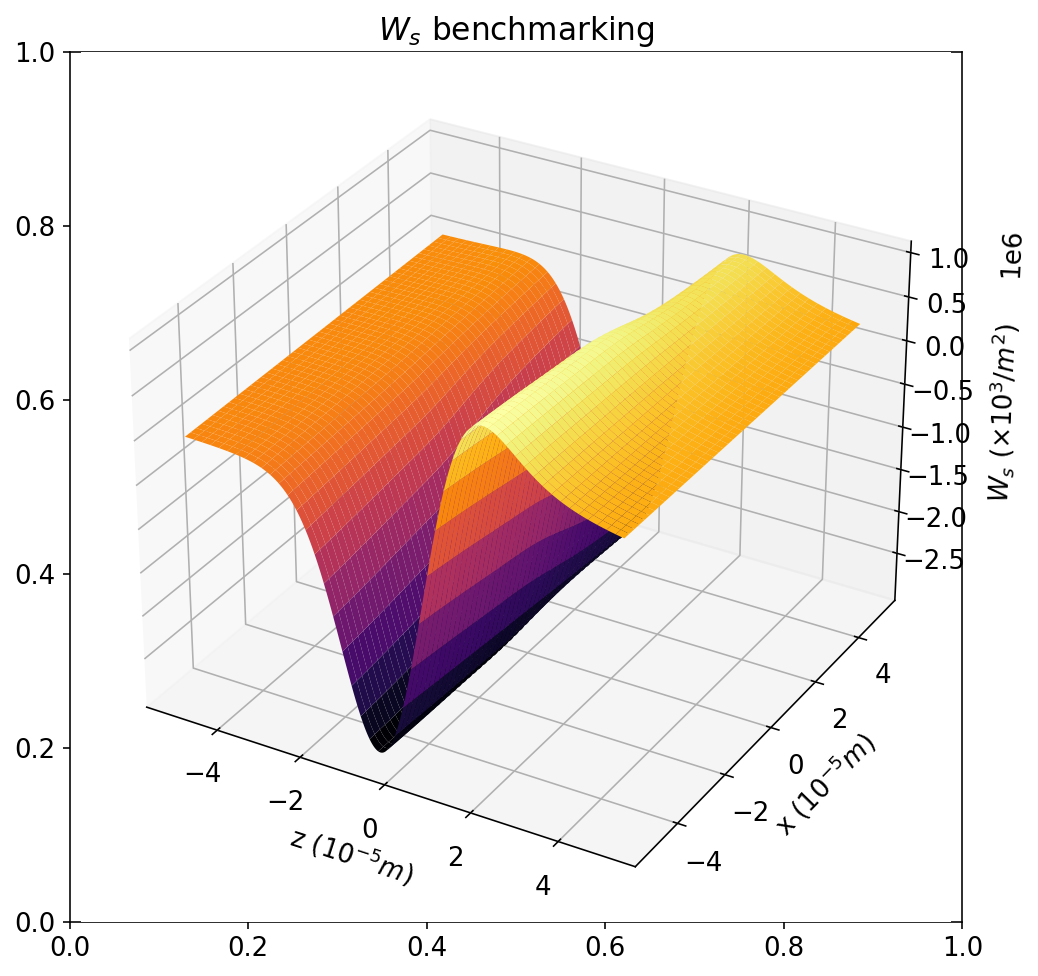

In [19]:
from mpl_toolkits import mplot3d
Z, X = np.meshgrid(zvec, xvec, indexing='ij')

# plotting the surface from numerical computation
fig, ax = plt.subplots(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(Z*1e5, X*1e5, Ws_grid , cmap='inferno', zorder=1)


ax.set_xlabel(r'z $(10^{-5}m)$')
ax.set_ylabel(r'x $(10^{-5}m)$')
ax.set_zlabel(r'$W_s$ $(\times 10^3/m^2)$ ')
ax.zaxis.labelpad = 10
ax.set_title(r'$W_s$ benchmarking')

In [20]:
t1 = time.time()
Es_grid = green_mesh((nz, nx), (dz, dx), rho=rho, gamma=gamma, component= 'Es_IGF')

t2 = time.time()
print('IGF for Es takes:', t2-t1, 'sec')

IGF for 12288 points...


/global/homes/w/wlou1991/cfs/CSR2D/csr2d/wake.py:127: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(func_z, z-dz/2, z+dz/2,


Done. Starting midpoint method...
IGF for Es takes: 6.4101316928863525 sec


In [21]:
conv_s2 = fftconvolve2(lambda_grid_filtered, Es_grid)[0]
Ws_grid2 = (beta**2 / abs(rho)) * conv_s2 *(dx*dz)

Text(0.5, 0.92, '$W_s$ benchmarking')

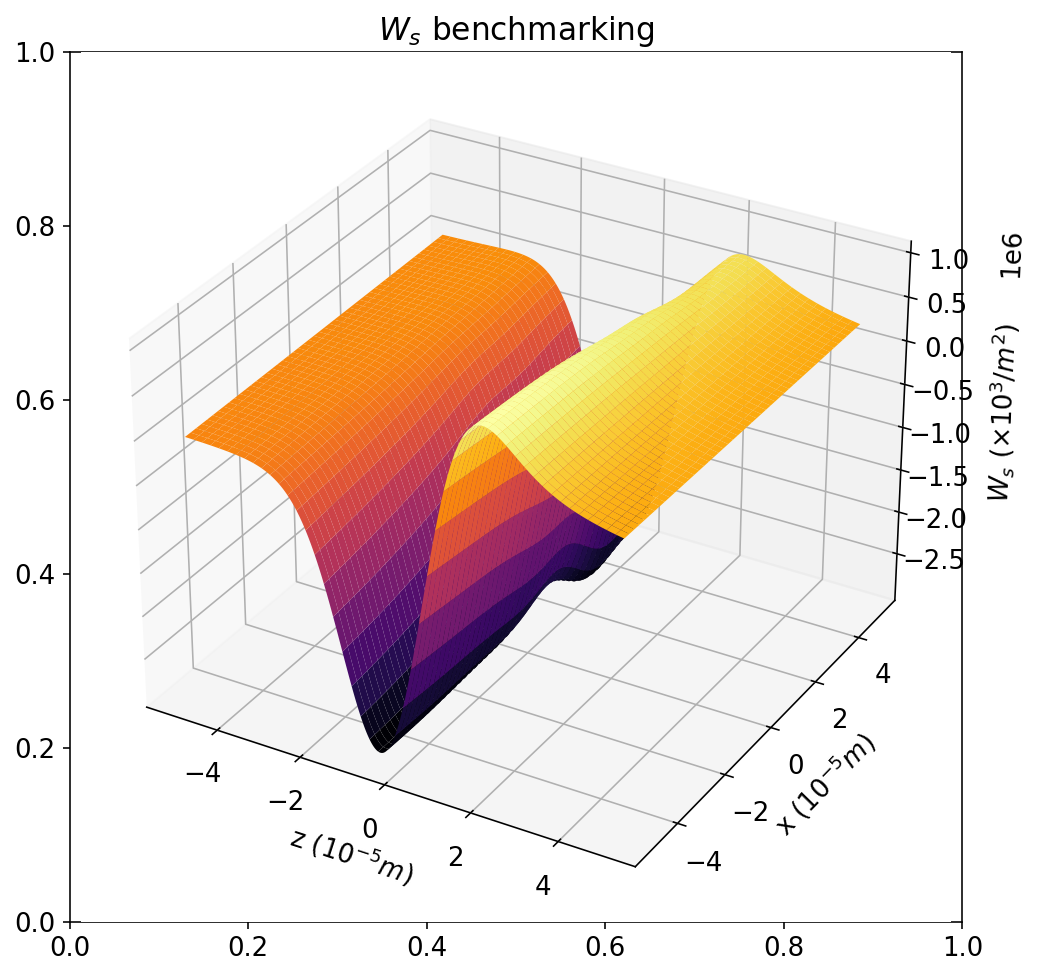

In [22]:
# plotting the surface from numerical computation
fig, ax = plt.subplots(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(Z*1e5, X*1e5, Ws_grid2 , cmap='inferno', zorder=1)


ax.set_xlabel(r'z $(10^{-5}m)$')
ax.set_ylabel(r'x $(10^{-5}m)$')
ax.set_zlabel(r'$W_s$ $(\times 10^3/m^2)$ ')
ax.zaxis.labelpad = 10
ax.set_title(r'$W_s$ benchmarking')

x_observe_index : 1023


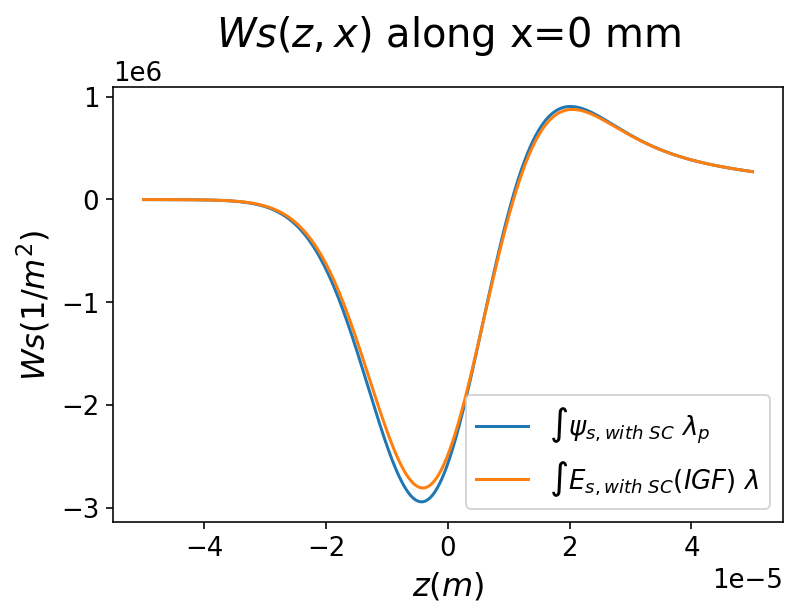

In [23]:
x_observe = 0
x_observe_index = np.argmin(np.abs(xvec - x_observe))
print('x_observe_index :', x_observe_index )

plt.plot(zvec, conv_s[:,x_observe_index]* (dz * dx), label=r'$\int \psi_{s, with~SC} ~ \lambda_p}$')
plt.plot(zvec, conv_s2[:,x_observe_index]* (dz * dx), label=r'$\int E_{s, with~SC} (IGF) ~ \lambda}$')

plt.xlabel(r'$z(m)$', fontsize=16)
plt.ylabel(r'$Ws (1/m^2)$', fontsize=16)
plt.title(fr'$Ws(z,x)$ along x={x_observe} mm',  fontsize=20, pad=20)
plt.legend()

### Do not run this cell! 
### Unless you comment out the SC terms in core2.py and run the cells again

x_observe_index : 256


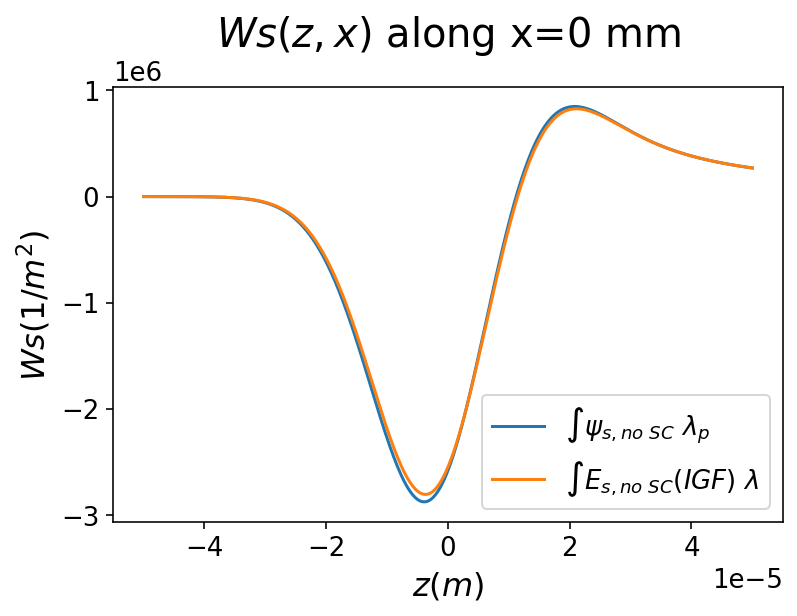

In [17]:
x_observe = 0
x_observe_index = np.argmin(np.abs(xvec - x_observe))
print('x_observe_index :', x_observe_index )

plt.plot(zvec, conv_s[:,x_observe_index]* (dz * dx), label=r'$\int \psi_{s, no~SC} ~ \lambda_p}$')
plt.plot(zvec, conv_s2[:,x_observe_index]* (dz * dx), label=r'$\int E_{s, no~SC} (IGF) ~ \lambda}$')

plt.xlabel(r'$z(m)$', fontsize=16)
plt.ylabel(r'$Ws (1/m^2)$', fontsize=16)
plt.title(fr'$Ws(z,x)$ along x={x_observe} mm',  fontsize=20, pad=20)
plt.legend()